# Final Project Submission

Please fill out:
* Student name: **Brian Bentson**
* Student pace: self paced / part time / full time: **Full Time**
* Scheduled project review date/time:
* Instructor name: **James Irving**
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

# Table of Contents

*Click to jump to matching Markdown Header.*<br>
 
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[DATA COLLECTION](#DATA-COLLECTION)**<br>
- **[DATA CLEANING](#DATA-CLEANING)**<br>
- **[DATA EXPLORATION](#DATA-EXPLORATION)**<br>
- **[DATA MODELING](#DATA-MODELING)**<br>
- **[DATA INTERPRETATION](#DATA-INTERPRETATION)**<br>
- **[RECOMMENDATIONS AND CONCLUSIONS](#RECOMMENDATIONS-AND-CONCLUSIONS)<br>**

# INTRODUCTION

The Tanzanian Ministry of Water tracks vital information on water wells in its country to best ensure citizens are provided with a continual source of fresh water. A dataset housing this vital information can be found [HERE](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/). 

I will be utilizing this dataset to train a classification model to accurately predict which water wells are not functional and also to gain insights into potential reasons for water well failures.

## Business Statement

It is undoubtedly obvious how crucial a consistent water supply is to every living thing in this world. Without it, life is not sustainable. A human can survive without food on average for about 1 to 2 months. However, a human can only survive 3 days without water! This time-frame without water can be shortened even further in climates which are extremely hot and humid. Tanzania, located on the east coast of Africa on the Indian Ocean, has parts of the country that are extremely hot and humid. The average high and low temperature in the most populous city of Dar es Salaam during the year is 86$^\circ$F and 70$^\circ$F, respectively. Dar es Salaam is located on the coast and has a average relative humidity of 70%. 

It is, therefore, extremely imperative to be able to supply a consistent source of fresh water for sustainment of human life in Tanzania. This begins with the evaluation of water wells in Tanzania with an emphasis on how reliability can be maximized to ensure a consistent supply of water is attainable. Unfortunately, our reliance on equipment (in this case a mechanical pump) means that 100% reliability can never be achieved. It is best to consider both reliability of the equipment and how quickly we can respond to an equipment failure and get it back to a running state. The response time to fixing a mechanical failure can be shortened with first predicting which water wells will fail. This key information can help maintenance organizations to ensure they have labor, tools and supplies ready to be mobilized in case of a failure. I will use machine learning to build a model to best predict water well failures in an attempt to understand what improvements can be made to factors such as funding, technology and maintenance operations.



## Analysis Methodology

The dataset has information on 59,400 water wells in Tanzania, for which only 55% are fully operational based on this dataset. Information on these water wells includes many important factors that impact their operability and will be explored in order to provide insight into how reliability, and therefore accessibility, can be maximized. I will clean and explore the data to best be utilized with a classification machine learning model to predict failure. 

# DATA COLLECTION

## Import Packages

In [43]:
#data wrangling and visualization packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
#feature engineering packages



#modeling packages
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#modeling evaluation packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [44]:
#notebook settings
pd.set_option("display.max_columns", 40)
pd.options.display.float_format = '{:,}'.format

## Global Functions

In [45]:
def col_eval(df, col_names, label_count=25, thresh=0.025):
    '''
    
    '''
    for col in col_names:
                    
        print('=============================================================')
        print(f'Column Name: {col}')
        print('\n')
                
        print(f'The number of unique labels is: {df[col].nunique()}')
        print('\n')
        
        print(f'There are {df[col].duplicated().sum()} duplicates')
        print('\n')
        
        print(f'There are {df[col].isna().sum()} null values')
        print('\n')
        
        print('Value Counts Percentage', '\n', 
              df[col].value_counts(normalize=True, dropna=False).round(2)*100)
        print('\n')
        print('Descriptive Metrics:','\n',
              df[col].describe())
                  
        fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,8))
        ax[0] = df[col].value_counts(normalize=True, dropna=False)[:label_count].plot.bar(label=f'{col} Percentage')
        ax[0].axhline(y=thresh, color='red', linestyle='--', 
                    label=f'{thresh*100}% Threshold')
        ax[0].set_title(f'{col} Value Counts')
        ax[0].set_xlabel(f'{col} Labels')
        ax[0].set_ylabel('Percentage')
        ax[0].legend()
        plt.show()
        print('\n')
        
        sns.boxplot(x=df[col], ax=ax[1])
        
        

In [46]:
def rare_labels(df, col_name, thresh=.01):

    df_temp = pd.Series(df[col_name].value_counts(normalize=True))

    rare_dict = {
        label: ('Other' if label not in df_temp[df_temp >= thresh].index else label)
        for label in df_temp.index
    }

    # now I replace the rare categories
    tmp = df[col_name].map(rare_dict)

    return tmp

## Import Data into Pandas

In [47]:
df_original = pd.read_csv('Data/water_well_data.csv')
df_original.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,...,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,"6,000.0",2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,...,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,...,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.46066446,-3.82132853,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,...,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,...,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.13084671,-1.82535885,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,...,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Data Schema

**Taken from:** https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

- `amount_tsh` - Total static head (amount water available to waterpoint)
- `date_recorded` - The date the row was entered
- `funder` - Who funded the well
- `gps_height` - Altitude of the well
- `installer` - Organization that installed the well
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `wpt_name` - Name of the waterpoint if there is one
- `num_private` -
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `region` - Geographic location
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)
- `lga` - Geographic location
- `ward` - Geographic location
- `population` - Population around the well
- `public_meeting` - True/False
- `recorded_by` - Group entering this row of data
- `scheme_management` - Who operates the waterpoint
- `scheme_name` - Who operates the waterpoint
- `permit` - If the waterpoint is permitted
- `construction_year` - Year the waterpoint was constructed
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint


**Supplemental Resources**

Column abbrevation meanings: https://pdf.usaid.gov/pdf_docs/PA00JZJ5.pdf

## Investigate Data

In [48]:
#evaluate dataframe null values, column names and data types
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

> **OBSERVATIONS**
> - Many columns to explore for null value imputation
> - Column names are already standardized
> - Data types will require further evaluation during feature engineering

In [49]:
#evaluate numerical data descriptive statistics
df_original.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,"59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0"
mean,"37,115.131767676765",317.6503846801347,668.297239057239,34.077426692028794,-5.706032659626431,0.47414141414141414,15.297003367003366,5.629747474747475,179.90998316498317,"1,300.6524747474748"
std,"21,453.12837131775","2,997.574558142169",693.11635032505,6.567431845646531,2.946019081267248,12.236229810496686,17.58740633733205,9.633648629454566,471.48217573848035,951.6205473151729
min,0.0,0.0,-90.0,0.0,-11.64944018,0.0,1.0,0.0,0.0,0.0
25%,"18,519.75",0.0,0.0,33.09034738,-8.540621305,0.0,5.0,2.0,0.0,0.0
50%,"37,061.5",0.0,369.0,34.90874343,-5.021596649999999,0.0,12.0,3.0,25.0,"1,986.0"
75%,"55,656.5",20.0,"1,319.25",37.17838657,-3.3261556399999996,0.0,17.0,5.0,215.0,"2,004.0"
max,"74,247.0","350,000.0","2,770.0",40.34519307,-2e-08,"1,776.0",99.0,80.0,"30,500.0","2,013.0"


> **OBSERVATIONS**
> - Many of these numerical features should be transformed into a categorical feature
> - `num_private`, `construction_year`, `population`, and `district_code` has a minimum of 0 which may be a placeholder for unknown
> - `amount_tsh` needs to be explored further as there seem to be a lot of 0's as the median is 0 while the mean is 317.

In [50]:
#evaluate missing values
df_original.isna().mean()

id                                        0.0
amount_tsh                                0.0
date_recorded                             0.0
funder                     0.0611952861952862
gps_height                                0.0
installer                0.061531986531986535
longitude                                 0.0
latitude                                  0.0
wpt_name                                  0.0
num_private                               0.0
basin                                     0.0
subvillage              0.0062457912457912455
region                                    0.0
region_code                               0.0
district_code                             0.0
lga                                       0.0
ward                                      0.0
population                                0.0
public_meeting            0.05612794612794613
recorded_by                               0.0
scheme_management         0.06526936026936027
scheme_name                0.47417

> **OBSERVATIONS**
> - 6 features with missing values around 5-6% and 1 feature, `scheme_name`, with 47% missing values 

# DATA CLEANING

In this section, I will focus on understanding the raw data quality and cleaning the data in preparation for data exploration and visualization. Feature engineering for modeling will be done in the [DATA_MODELING](#DATA-MODELING) section.

In [51]:
#create a df_clean dataframe
df_clean = df_original.copy()

## Numerical Features

Here I will evaluate all numerical features for feature engineering.

### Feature Evaluation

In [52]:
#create list of all numeric columns
num_cols = df_clean.select_dtypes(exclude='object').columns
print(f'There are {len(num_cols)} numerical columns: \n {num_cols}')

There are 10 numerical columns: 
 Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')


In [53]:
#display first 5 rows of numeric columns
df_clean[num_cols].head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,"6,000.0",1390,34.93809275,-9.85632177,0,11,5,109,1999
1,8776,0.0,1399,34.6987661,-2.14746569,0,20,2,280,2010
2,34310,25.0,686,37.46066446,-3.82132853,0,21,4,250,2009
3,67743,0.0,263,38.48616088,-11.15529772,0,90,63,58,1986
4,19728,0.0,0,31.13084671,-1.82535885,0,18,1,0,0


In [54]:
df_clean['amount_tsh'].value_counts()

0.0          41639
500.0         3102
50.0          2472
1,000.0       1488
20.0          1463
             ...  
8,500.0          1
6,300.0          1
220.0            1
138,000.0        1
12.0             1
Name: amount_tsh, Length: 98, dtype: int64

In [55]:
num_labels = df_clean['amount_tsh'].nunique()
num_labels

98

In [56]:
dups = df_clean['amount_tsh'].duplicated().sum()
dups

59302

In [57]:
null_vals = df_clean['amount_tsh'].isna().sum()
null_vals

0

In [58]:
zero_vals = (df_clean['amount_tsh'] == 0).sum()
zero_vals

41639

(array([20709.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 38691.]),
 array([   0. ,  201.3,  402.6,  603.9,  805.2, 1006.5, 1207.8, 1409.1,
        1610.4, 1811.7, 2013. ]),
 <BarContainer object of 10 artists>)

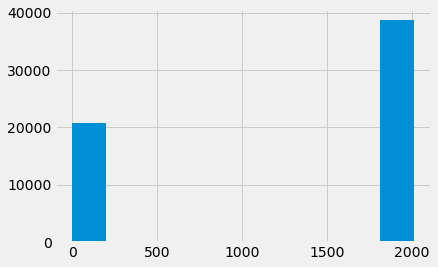

In [59]:
plt.hist(x=df_clean['construction_year'])

<AxesSubplot:>

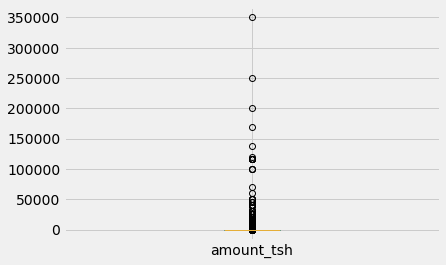

In [60]:
df_clean.boxplot(column='amount_tsh')

<BarContainer object of 10 artists>

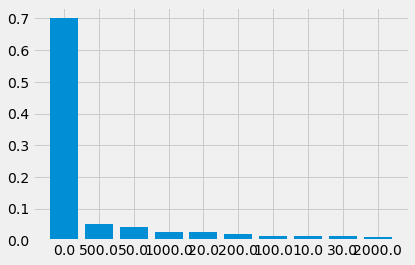

In [61]:
df = pd.DataFrame(df_clean['amount_tsh'].value_counts(normalize=True, dropna=False)).reset_index()
df['index'] = df['index'].astype(str)
df = df.sort_values('amount_tsh', ascending=False)
df = df[:10]
plt.bar(x=df['index'], height=df['amount_tsh'])

In [62]:
plt.bar(x=)

SyntaxError: invalid syntax (<ipython-input-62-ec3891b0911a>, line 1)

Column Name: id


The number of unique labels is: 59400


There are 0 duplicates


There are 0 null values


Value Counts Percentage 
 2047    0.0
72310   0.0
49805   0.0
51852   0.0
62091   0.0
         ..
46396   0.0
36155   0.0
34106   0.0
38200   0.0
0       0.0
Name: id, Length: 59400, dtype: float64


Descriptive Metrics: 
 count              59,400.0
mean    37,115.131767676765
std      21,453.12837131775
min                     0.0
25%               18,519.75
50%                37,061.5
75%                55,656.5
max                74,247.0
Name: id, dtype: float64


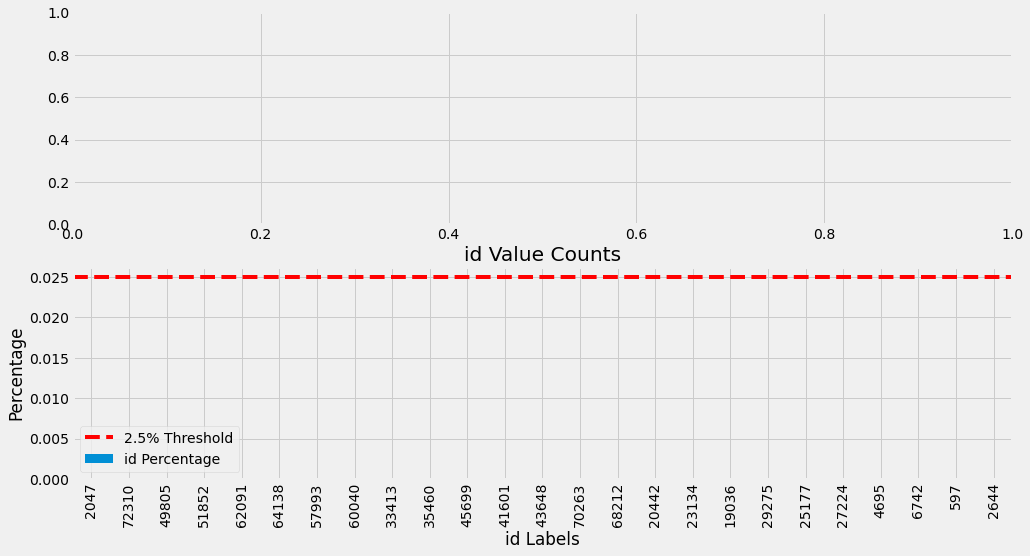

In [63]:
col_eval(df_clean, ['id'])

> **OBSERVATIONS**
> - `id` should be changed to categorical as it is a unique identifier for each well

> **ACTIONS**
> - Will recast `id` as categorical

Column Name: amount_tsh


The number of unique labels is: 98


There are 59302 duplicates


There are 0 null values


Value Counts Percentage 
 0.0         70.0
500.0        5.0
50.0         4.0
1,000.0      3.0
20.0         2.0
            ... 
8,500.0      0.0
6,300.0      0.0
220.0        0.0
138,000.0    0.0
12.0         0.0
Name: amount_tsh, Length: 98, dtype: float64


Descriptive Metrics: 
 count             59,400.0
mean     317.6503846801347
std     2,997.574558142169
min                    0.0
25%                    0.0
50%                    0.0
75%                   20.0
max              350,000.0
Name: amount_tsh, dtype: float64


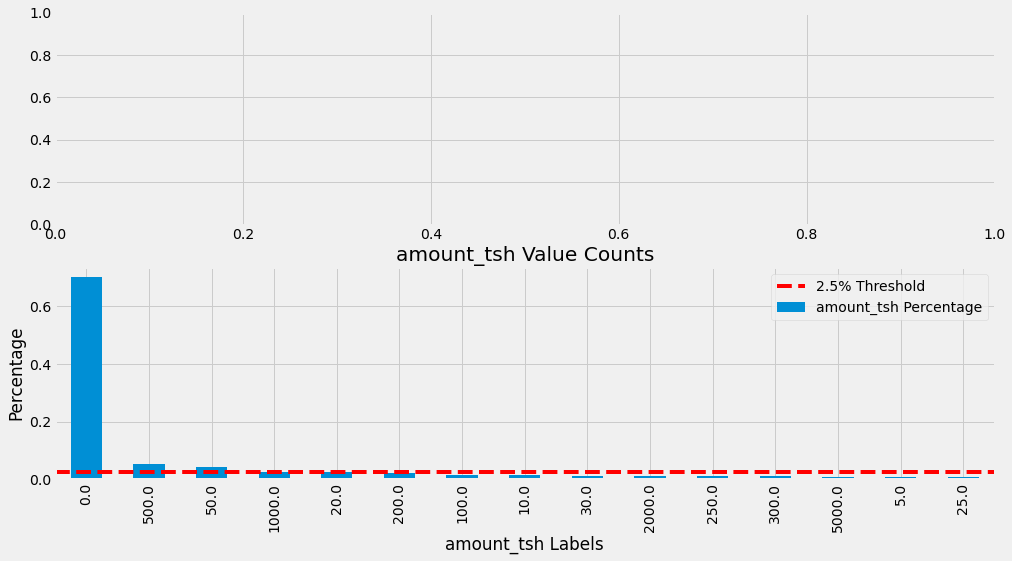

In [64]:
col_eval(df_clean, ['amount_tsh'])

> **OBSERVATIONS**
> - `region_code` and `district_code` should be changed to categorical
> - `id` should be changed to categorical
> - `date_recorded` should be converted to a datetime object

> **ACTIONS**
> - convert `region_code`, and `district_code` to categorical features
> - convert `id` to categorical
> - convert `date_recorded` to a datetime object

### Feature Data Type Recast

I will change data types for numeric features here.

In [65]:
#convert region_code to categorical
df_clean['region_code'] = df_clean['region_code'].astype('object')

===============================================================================================================

In [66]:
#convert district_code to categorical
df_clean['district_code'] = df_clean['district_code'].astype('object')

===============================================================================================================

In [67]:
#convert id to categorical
df_clean['id'] = df_clean['id'].astype('object')

===============================================================================================================

In [68]:
#convert date_recorded to datetime object
df_clean['date_recorded'] = pd.to_datetime(df_clean['date_recorded'])

===============================================================================================================

In [69]:
#update num_cols
num_cols = df_clean.select_dtypes(exclude='object').columns

### Feature Drop

In [70]:
#review dataframe for feature drops
display(df_clean[num_cols].head(), df_clean[num_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   amount_tsh         59400 non-null  float64       
 1   date_recorded      59400 non-null  datetime64[ns]
 2   gps_height         59400 non-null  int64         
 3   longitude          59400 non-null  float64       
 4   latitude           59400 non-null  float64       
 5   num_private        59400 non-null  int64         
 6   population         59400 non-null  int64         
 7   construction_year  59400 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 3.6 MB


,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,population,construction_year
0,"6,000.0",2011-03-14,1390,34.93809275,-9.85632177,0,109,1999
1,0.0,2013-03-06,1399,34.6987661,-2.14746569,0,280,2010
2,25.0,2013-02-25,686,37.46066446,-3.82132853,0,250,2009
3,0.0,2013-01-28,263,38.48616088,-11.15529772,0,58,1986
4,0.0,2011-07-13,0,31.13084671,-1.82535885,0,0,0


None

**OBSERVATIONS**
> - `num_private` needs to be further evaluated for dropping
> - `amount_tsh` has 0's, not sure if that is actually a 0 or a placeholder
> - `date_recorded` needs to be evaluated for dropping

**ACTIONS**
> - evaluate each numerical column for feature drops

===============================================================================================================

Column Name: amount_tsh


The number of unique labels is: 98


There are 59302 duplicates


There are 0 null values


Value Counts Percentage 
 0.0         70.0
500.0        5.0
50.0         4.0
1,000.0      3.0
20.0         2.0
            ... 
8,500.0      0.0
6,300.0      0.0
220.0        0.0
138,000.0    0.0
12.0         0.0
Name: amount_tsh, Length: 98, dtype: float64


Descriptive Metrics: 
 count             59,400.0
mean     317.6503846801347
std     2,997.574558142169
min                    0.0
25%                    0.0
50%                    0.0
75%                   20.0
max              350,000.0
Name: amount_tsh, dtype: float64


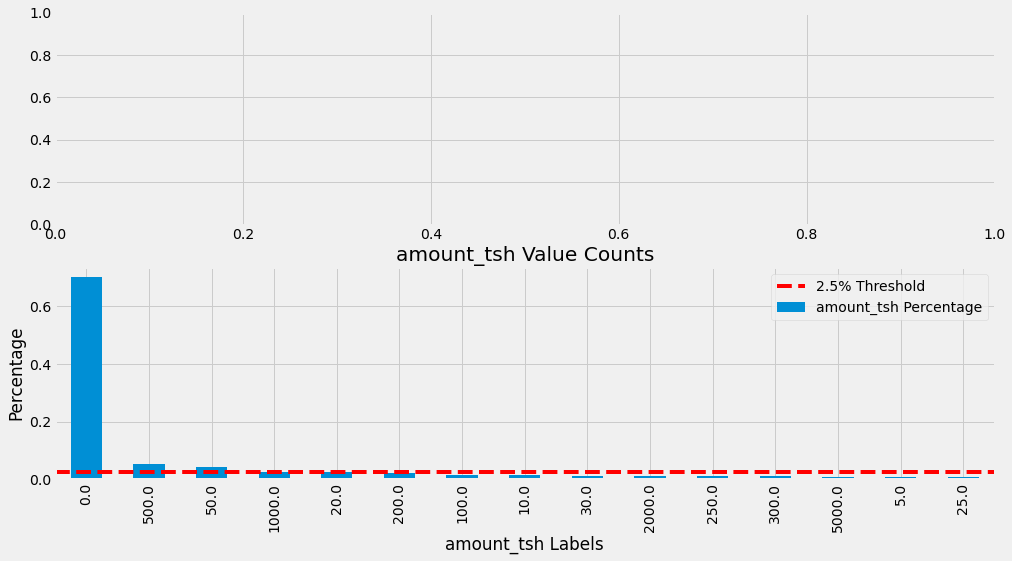

In [71]:
#eval amount_tsh
col_eval(df_clean, ['amount_tsh'])

> **OBSERVATIONS**
> - `amount_tsh` has many 0's and needs to be evaluated for imputation and outliers
> - there are extreme outliers on the high end
> - 

===============================================================================================================

Column Name: num_private


The number of unique labels is: 65


There are 59335 duplicates


There are 0 null values


Value Counts Percentage 
 0     99.0
6      0.0
1      0.0
5      0.0
8      0.0
      ... 
180    0.0
213    0.0
23     0.0
55     0.0
94     0.0
Name: num_private, Length: 65, dtype: float64


Descriptive Metrics: 
 count              59,400.0
mean    0.47414141414141414
std      12.236229810496686
min                     0.0
25%                     0.0
50%                     0.0
75%                     0.0
max                 1,776.0
Name: num_private, dtype: float64


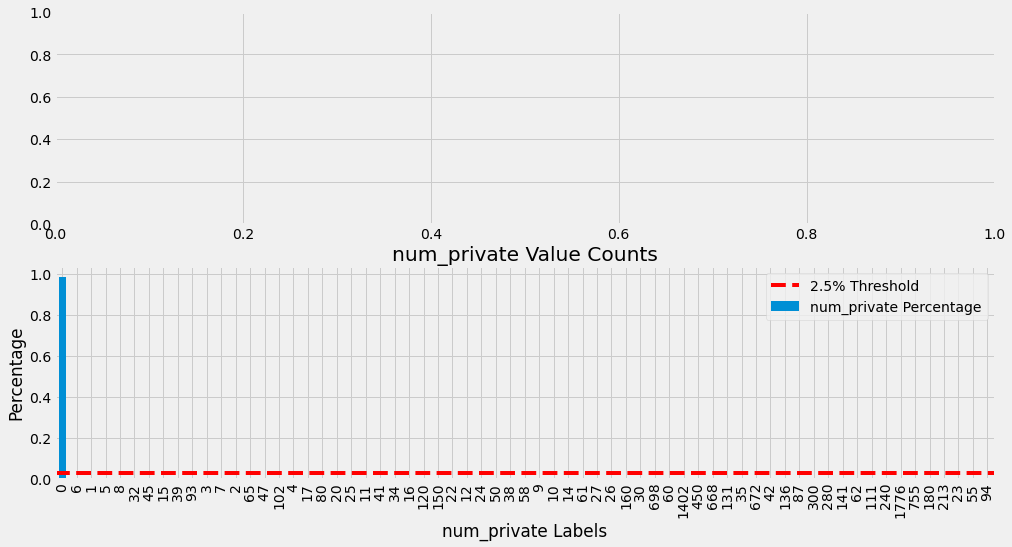

In [72]:
#evaluate num_private
col_eval(df_clean,['num_private'], label_count=65)

> **OBSERVATIONS**
> - Because `num_private` is dominated by a single value (98.7% zero) and the data schema does not clearly state what it means, I will drop this column from the analysis.

> **ACTIONS**
> - Drop `num_private` column

In [73]:
#drop num_private 
df_clean.drop(columns='num_private', inplace=True)

===============================================================================================================

===============================================================================================================

In [74]:
df_clean.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,"6,000.0",2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Duplicates

I will check for duplicates in the dataset.

In [75]:
#check for duplicates across the entire dataset
df_clean.duplicated().sum()

0

===============================================================================================================

In [76]:
# check for duplicates for id feature
df_clean['id'].duplicated().sum()

0

> **OBSERVATIONS**
> - No duplicates seen

## Feature Imputation

In [77]:
#check for missing values
df_clean.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

> **OBSERVATIONS**
> - Missing values around 5-6% for some features and 47% for `scheme_name`

> - **ACTIONS**
> - Will evaluate imputation techniques for these missing values

In [78]:
cat_eval(df_clean, ['amount_tsh'])

NameError: name 'cat_eval' is not defined

===============================================================================================================

In [79]:
#evaluate subvillage for imputation
df_clean['subvillage'].value_counts(dropna=False)

Madukani           508
Shuleni            506
Majengo            502
Kati               373
NaN                371
                  ... 
Jasini               1
Kwa Yusuph           1
Isebelo A            1
Ngusero Manyata      1
Chilovya             1
Name: subvillage, Length: 19288, dtype: int64

> **OBSERVATIONS**
> - There are 371 missing values, which is 0.6% of the rows.

> **ACTIONS**
> - I will label these as "Unknown"

In [80]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['subvillage'].isna() == True, ['subvillage']] = 'Unknown'
df_clean['subvillage'].value_counts(dropna=False)

Madukani           508
Shuleni            506
Majengo            502
Kati               373
Unknown            371
                  ... 
Kwa Yusuph           1
Isebelo A            1
Ngusero Manyata      1
Magera               1
Chilovya             1
Name: subvillage, Length: 19288, dtype: int64

===============================================================================================================

In [81]:
#evaluate funder for imputation
df_clean['funder'].value_counts(dropna=False)

Government Of Tanzania          9084
NaN                             3635
Danida                          3114
Hesawa                          2202
Rwssp                           1374
                                ... 
Japan  Food Aid Counter Part       1
Hesswa                             1
Muslim World                       1
Mwakabalula                        1
Rudep /dwe                         1
Name: funder, Length: 1898, dtype: int64

> **OBSERVATIONS**
> - There are 3635 missing values, which is 6% of the rows.

> **ACTIONS**
> - I will combine these with the "Unknown" label

In [82]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['funder'].isna() == True, ['funder']] = 'Unknown'
df_clean['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
Unknown                   3639
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Gra Na Halmashauri           1
Roman Cathoric Church        1
Saudia                       1
Da Unoperaio Siciliano       1
Amrefe                       1
Name: funder, Length: 1897, dtype: int64

===============================================================================================================

In [83]:
#evaluate installer for imputation
df_clean['installer'].value_counts(dropna=False)

DWE                  17402
NaN                   3655
Government            1825
RWE                   1206
Commu                 1060
                     ...  
AFRICA MUSLIM            1
Aartisa                  1
Nyabarongo Kegoro        1
Busoga trust             1
Latifu                   1
Name: installer, Length: 2146, dtype: int64

> **OBSERVATIONS**
> - There are 3655 missing values, which is 6% of the rows.

> **ACTIONS**
> - I will combine these with the "Unknown" label

In [84]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['installer'].isna() == True, ['installer']] = 'Unknown'
df_clean['installer'].value_counts(dropna=False)

DWE                           17402
Unknown                        3658
Government                     1825
RWE                            1206
Commu                          1060
                              ...  
Natio                             1
Charlotte Well                    1
LOLMOLOKI                         1
Ministry of water                 1
MKONGO BUILDING CONTRACTOR        1
Name: installer, Length: 2145, dtype: int64

===============================================================================================================

In [85]:
#evaluate permit for imputation
df_clean['permit'].value_counts(dropna=False)

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64

> **OBSERVATIONS**
> - There are 3056 original missing values which were converted to string 'nan', which is 5% of the rows.

> **ACTIONS**
> - I will rename these "unknown"

In [86]:
#rename the 'nan' as "unknown"
df_clean.loc[df_clean['permit'] == 'nan', ['permit']] = 'Unknown'
df_clean['permit'].value_counts(dropna=False)

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64

===============================================================================================================

In [87]:
#evaluate public_meeting for imputation
df_clean['public_meeting'].value_counts(dropna=False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

> **OBSERVATIONS**
> - There are 3334 original missing values which were converted to string 'nan', which is 5% of the rows.

> **ACTIONS**
> - I will rename these "Unknown" 

In [88]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['public_meeting'] == 'nan', ['public_meeting']] = 'Unknown'
df_clean['public_meeting'].value_counts(dropna=False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

===============================================================================================================

In [89]:
#evaluate scheme_name for imputation
df_clean['scheme_name'].value_counts(dropna=False)

NaN                           28166
K                               682
None                            644
Borehole                        546
Chalinze wate                   405
                              ...  
Mradi wa maji wa kalunde          1
Kitarakakifua water supply        1
Magundi water supply              1
Tiflo masaki branch line          1
Kirongwe water supply             1
Name: scheme_name, Length: 2697, dtype: int64

> **OBSERVATIONS**
> - There are 28,166 missing values, which is 47% of the rows.

> **ACTIONS**
> - I will rename these "Unknown" 

In [90]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['scheme_name'].isna() == True, ['scheme_name']] = 'Unknown'
df_clean['scheme_name'].value_counts(dropna=False)

Unknown               28166
K                       682
None                    644
Borehole                546
Chalinze wate           405
                      ...  
Jica                      1
Ngumbaru Extension        1
Manonga                   1
Halmashauri               1
Wisi                      1
Name: scheme_name, Length: 2697, dtype: int64

===============================================================================================================

In [91]:
#evaluate scheme_management for imputation
df_clean['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

> **OBSERVATIONS**
> - There are 3,877 missing values, which is 6% of the rows.

> **ACTIONS**
> - I will rename these "Unknown" 

In [92]:
#rename the nulls as "unknown"
df_clean.loc[df_clean['scheme_management'].isna() == True, ['scheme_management']] = 'Unknown'
df_clean['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
Unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

===============================================================================================================

In [93]:
#evaluate construction year
df_clean['construction_year'].value_counts(1).head()

0      0.34863636363636363
2010   0.04452861952861953
2008   0.04398989898989899
2009   0.04264309764309764
2000    0.0352020202020202
Name: construction_year, dtype: float64

In [94]:
df_clean.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

> **OBSERVATIONS**
> - There are 20,709 "0" values, which is 34% of the rows.

> **ACTIONS**
> - I will evaluate further for imputation 

In [95]:
df_clean.groupby(['amount_tsh','status_group','extraction_type_1'])[['id']].count()

KeyError: 'extraction_type_1'

In [96]:
df_geo = df_clean[['lga','region','basin','subvillage','district_code','ward']]

for col in df_geo:
    print(col,df_geo[col].value_counts().count())

lga 125
region 21
basin 9
subvillage 19288
district_code 20
ward 2092


In [97]:
df_clean.groupby(['basin','district_code','region','lga','ward','subvillage']).count().head(50)

id  \
basin    district_code region lga     ward        subvillage            
Internal 1             Arusha Monduli Engaruka    Hyhh              1   
                                                  Madukani          1   
                                                  Mkaoo             3   
                                                  Mula              1   
                                                  Mwembeni          1   
                                      Engutoto    Lengeni           1   
                                                  Lengine           2   
                                                  Lesala            1   
                                                  Lositeti          1   
                                                  Orkaria           1   
                                      Esilalei    Baraka            4   
                                                  Chemchem          1   
                                                  Esmiti            1   
                                                  Jangwani          5   
                                                  Kambi Ya Mkaa     1   
                                                  Kigongoni         6   
                                                  Kirurumo          1   
                                                  Kisutu            1   
                                                  Korea             1   
                                                  Latimi            1   
                                                  Losirwa           7   
                                                  Magomeni          3   
                                                  Majengo A         3   
                                                  Majengo B         1   
                                                  Majengo C         4   
                                                  Majengo D         1   
                                                  Migombani Chini   1   
                                                  Migombani Juu     5   
                                                  Migombani Kati    2   
                                                  Migungani A       2   
                                                  Mlimani Park      3   
                                                  Mungere           2   
                                                  Oltukay           5   
                                                  Shuleni           2   
                                      Lolkisale   Olorisyo          2   
                                      Makuyuni    Engasiti          1   
                                                  Kanisani          1   
                                                  Lemioni           2   
                                                  Makuyuni         14   
                                                  Mswakini Kati     1   
                                                  Naiti             1   
                                                  Njaro             3   
                                                  Orbukoi           4   
                                                  Ormang'Wai        1   
                                                  Randiren          1   
                                                  Shimamo           1   
                                                  Shuleni           2   
                                                  Zaburi           10   
                                      Moita       Orpuruwa          3   
                                      Monduli Juu Alasai            1   

                                                                   amount_tsh  \
basin    district_code region lga     ward        subvillage                    
Internal 1             Arusha Monduli Engaruka    Hyhh                      1   
                           

## Feature Creation

In this section I will develop new features which I believe will improve the ability to gain insights into the data and possibly help modeling.

In [98]:
#current features
df_clean.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

### `well_age`

`well_age` will allow insight into how age of the well impacts operability. This feature will be created by taking the max of `recorded_date` and subtracting the `construction_year`. I will also need to see how I can impute when the `construction_year` is "0".

In [99]:
#extract the year from date_recorded feature
df_clean['date_recorded_yr'] = pd.DatetimeIndex(df_clean['date_recorded']).year
df_clean[['date_recorded_yr','date_recorded']].head()

,date_recorded_yr,date_recorded
0,2011,2011-03-14
1,2013,2013-03-06
2,2013,2013-02-25
3,2013,2013-01-28
4,2011,2011-07-13


In [100]:
#check for date_recorded_year year earlier than construction year
df_clean.loc[df_clean['date_recorded_yr'] < df_clean['construction_year'], ['id']].count()

id    9
dtype: int64

> **OBSERVATIONS**
> - There are 9 records where the `date_recorded_yr` is prior to the `construction_year`. 

> **ACTIONS**
> - I will remove these 9 rows.

In [101]:
#drop 9 rows
df_clean.drop(df_clean.loc[df_clean['date_recorded_yr'] < 
                           df_clean['construction_year']].index, inplace=True)

In [102]:
#check for failure year earlier than construction year
df_clean.loc[df_clean['date_recorded_yr'] < df_clean['construction_year'], ['id']].count()

id    0
dtype: int64

In [103]:
#value counts of construction_year
df_clean['construction_year'].value_counts(1).head(10)

0       0.34868919533262616
2010    0.04453536731154552
2008    0.04396289000016838
2009    0.04259904699365224
2000     0.0352073546496944
2007   0.026704382818945632
2006   0.024751224933070668
2003   0.021653112424441415
2011    0.02113114781700931
2004   0.018908588843427457
Name: construction_year, dtype: float64

construction_year   1,996.8120831394447
dtype: float64
construction_year   2,000.0
dtype: float64


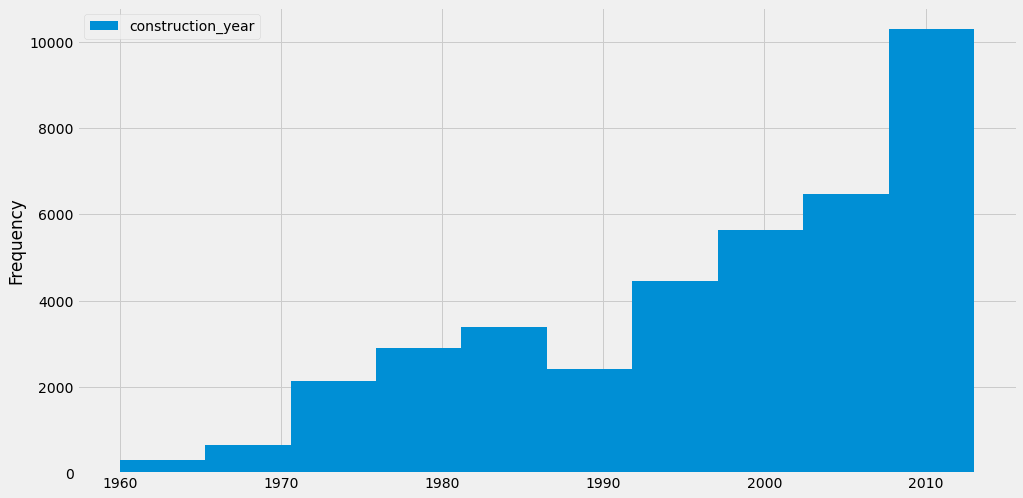

In [104]:
#histogram of construction_year without 0's
fig, ax = plt.subplots(figsize=(15,8))
df_clean.loc[df_clean['construction_year'] != 0,
             ['construction_year']].plot(kind='hist', ax=ax)
print(df_clean.loc[df_clean['construction_year'] != 0,['construction_year']].mean())
print(df_clean.loc[df_clean['construction_year'] != 0,['construction_year']].median())

> **OBSERVATIONS**
> - I do not see a good value to impute `construction_year` with as the data is skewed heavily

> **ACTIONS**
> - I will create the `well_age` feature and mark any which equate to "0" as "Unknown" for any row which has a `construction_year` of "0"

In [105]:
#create well_age feature
df_clean['well_age'] = df_clean['date_recorded_yr'].max() - df_clean['construction_year']
df_clean['well_age'].value_counts().head()

2013    20709
3        2645
5        2611
4        2530
13       2091
Name: well_age, dtype: int64

In [106]:
#convert construction_year = 0 to "Unknown"
df_clean.loc[df_clean['construction_year'] == 2013,['well_age']] = "Unknown"

In [107]:
df_clean['well_age'].value_counts()

2013       20709
3           2645
5           2611
4           2530
13          2091
6           1586
7           1470
10          1286
2           1255
9           1123
1           1084
11          1075
35          1037
18          1014
8           1010
14           979
15           966
23           954
28           945
33           811
17           811
29           779
31           744
19           738
41           708
39           676
16           644
21           640
20           608
12           540
25           521
30           488
38           437
27           434
37           414
43           411
22           324
24           316
26           302
32           238
36           202
34           192
40           184
Unknown      176
42           145
53           102
46            88
50            85
45            77
44            59
49            40
51            30
52            21
48            19
47            17
Name: well_age, dtype: int64

Binning well age??

In [108]:
#check value counts
df_clean['well_age'].value_counts().head()

2013    20709
3        2645
5        2611
4        2530
13       2091
Name: well_age, dtype: int64

### `impact_rating`

I want to create a feature which summarizes the impact each well has on the community. This feature will weigh the following features:
1. `status_group`
    - functional +0
    - broken +10
    - not functional +15
2. `population`
    - 25th percentile +0
    - 50th percentile +1
    - 75th percentile +2
    - 100th percentile +3
3. `amount_tsh`
    - 25th percentile +3
    - 50th percentile +2
    - 75th percentile +1
    - 100th percentile +0
4. `water_quality`
    - 25th percentile +3
    - 50th percentile +2
    - 75th percentile +1
    - 100th percentile +0
5. `quantity`
    - 25th percentile +3
    - 50th percentile +2
    - 75th percentile +1
    - 100th percentile +0
6. `well_age`
    - 25th percentile +0
    - 50th percentile +1
    - 75th percentile +2
    - 100th percentile +3
    
These metrics all describe how impactful water is to the surrounding community and will help bring insight into which water wells need to be prioritized amongst the rest.

In [109]:
#create status_group_rating feature
status_group_rating_dict = {'functional': 0, 'needs repair':10, 'non functional':15}

df_clean['status_group_rating'] = df_clean['status_group'].map(status_group_rating_dict)
df_clean['status_group_rating'].value_counts()

0.0     32255
15.0    22819
Name: status_group_rating, dtype: int64

In [110]:
#create population_rating feature
df_clean['population_rating'] = 0

In [111]:
#fill in population rating based on population feature
p25 = df_clean['population'].quantile(q=0.25)
p50 = df_clean['population'].quantile(q=0.50)
p75 = df_clean['population'].quantile(q=0.75)

df_clean.loc[(df_clean['population'] == 0),['population_rating']] = -15

df_clean.loc[((df_clean['population'] !=0) & 
              (df_clean['population'] <= p25)),['population_rating']] = 0

df_clean.loc[((df_clean['population'] > p25) & 
              (df_clean['population'] <= p50)),['population_rating']] = 1

df_clean.loc[((df_clean['population'] > p50) & 
              (df_clean['population'] <= p75)),['population_rating']] = 2

df_clean.loc[(df_clean['population'] > p75),['population_rating']] = 3
df_clean['population_rating'].value_counts()

-15    21381
 3     14848
 2     14774
 1      8388
Name: population_rating, dtype: int64

In [112]:
#create population_rating

# for value in df_clean['population']:
#     p25 = df_clean['population'].quantile(q=0.25)
#     p50 = df_clean['population'].quantile(q=0.50)
#     p75 = df_clean['population'].quantile(q=0.75)
    
#     if value == 0:
#         df_clean.loc[df_clean['population_rating'] = -15]
#     elif (value != 0) & (value <= p25):
#         df_clean['population_rating'] = 0
#     elif (value > p25) & (value <= p50):
#         df_clean['population_rating'] = 1
#     elif (value > p50) & (value <= p75):
#         df_clean['population_rating'] = 2
#     else:
#         df_clean['population_rating'] = 3

In [113]:
#create amount_tsh_rating feature
df_clean['amount_tsh_rating'] = 0

In [114]:
#fill in amount_tsh_rating based on amount_tsh feature
p25 = df_clean['amount_tsh'].quantile(q=0.25)
p50 = df_clean['amount_tsh'].quantile(q=0.50)
p75 = df_clean['amount_tsh'].quantile(q=0.75)

df_clean.loc[(df_clean['amount_tsh'] == 0),['amount_tsh_rating']] = -15

df_clean.loc[((df_clean['amount_tsh'] !=0) & 
              (df_clean['amount_tsh'] <= p25)),['amount_tsh_rating']] = 0

df_clean.loc[((df_clean['amount_tsh'] > p25) & 
              (df_clean['amount_tsh'] <= p50)),['amount_tsh_rating']] = 1

df_clean.loc[((df_clean['amount_tsh'] > p50) & 
              (df_clean['amount_tsh'] <= p75)),['amount_tsh_rating']] = 2

df_clean.loc[(df_clean['amount_tsh'] > p75),['amount_tsh_rating']] = 3
df_clean['amount_tsh_rating'].value_counts()

-15    41634
 3     14817
 2      2940
Name: amount_tsh_rating, dtype: int64

In [115]:
df_clean[['amount_tsh','amount_tsh_rating']].value_counts()

amount_tsh  amount_tsh_rating
0.0         -15                  41634
500.0        3                    3101
50.0         3                    2471
1,000.0      3                    1488
20.0         2                    1462
                                 ...  
5,400.0      3                       1
6,300.0      3                       1
8,500.0      3                       1
38,000.0     3                       1
350,000.0    3                       1
Length: 98, dtype: int64

In [116]:
#create water_quality_rating feature
df_clean['water_quality_rating'] = 0

In [117]:
df_clean['water_quality'].value_counts()

soft                  50810
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         338
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [118]:
#fill in water_quality_rating based on water_quality feature

df_clean.loc[(df_clean['water_quality'] == 'soft-good'),
             ['water_quality_rating']] = 0

df_clean.loc[(df_clean['water_quality'] != 'soft-good'),
             ['water_quality_rating']] = 5

df_clean['water_quality_rating'].value_counts()

5    59391
Name: water_quality_rating, dtype: int64

In [119]:
#create water_quantity_rating feature
df_clean['water_quantity_rating'] = 0

In [120]:
df_clean['quantity'].value_counts()

enough          33181
insufficient    15129
dry              6243
seasonal         4049
unknown           789
Name: quantity, dtype: int64

In [121]:
#fill in water_quantity_rating based on quanitity feature

df_clean.loc[(df_clean['quantity'] == 'enough'),
             ['water_quantity_rating']] = 0

df_clean.loc[(df_clean['quantity'] != 'enough'),
             ['water_quantity_rating']] = 5

df_clean['water_quantity_rating'].value_counts()

0    33181
5    26210
Name: water_quantity_rating, dtype: int64

In [122]:
#create well_age_rating feature
df_clean['well_age_rating'] = 0

In [123]:
df_clean['well_age'].value_counts()

2013       20709
3           2645
5           2611
4           2530
13          2091
6           1586
7           1470
10          1286
2           1255
9           1123
1           1084
11          1075
35          1037
18          1014
8           1010
14           979
15           966
23           954
28           945
33           811
17           811
29           779
31           744
19           738
41           708
39           676
16           644
21           640
20           608
12           540
25           521
30           488
38           437
27           434
37           414
43           411
22           324
24           316
26           302
32           238
36           202
34           192
40           184
Unknown      176
42           145
53           102
46            88
50            85
45            77
44            59
49            40
51            30
52            21
48            19
47            17
Name: well_age, dtype: int64

In [124]:
df_clean

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,...,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,date_recorded_yr,well_age,status_group_rating,population_rating,amount_tsh_rating,water_quality_rating,water_quantity_rating,well_age_rating
0,69572,"6,000.0",2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,...,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,14,0.0,2,3,5,0,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,...,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,0.0,3,-15,5,5,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,...,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,4,0.0,3,3,5,0,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,...,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,27,15.0,2,-15,5,5,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,Unknown,...,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,2013,0.0,-15,-15,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.16980689,-3.25384746,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,...,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2013,14,0.0,2,2,5,0,0
59396,27263,"4,700.0",2011-05-07,Cefa-njombe,1212,Cefa,35.24999126,-9.0706288,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,...,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,2011,17,0.0,2,3,5,0,0
59397,37057,0.0,2011-04-11,Unknown,0,Unknown,34.01708706,-8.75043433,Mashine,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,...,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011,2013,0.0,-15,-15,5,0,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.86131531,-6.37857327,Mshoro,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,...,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011,2013,0.0,-15,-15,5,5,0


## Feature and Label Renaming

I will review feature and label names and make logical changes in naming and in ordering.

In [125]:
#update status_group labels
status_group_dict = {'functional':'functional',
                     'non functional':'non functional',
                     'functional needs repair':'needs repair'}
df_clean['status_group'] = df_clean['status_group'].map(status_group_dict)
df_clean['status_group'].value_counts()

functional        32255
non functional    22819
needs repair       4317
Name: status_group, dtype: int64

In [126]:
#column names
df_clean.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'date_recorded_yr', 'well_age', 'status_group_rating',
       'population_rating', 'amount_tsh_rating', 'water_quality_rating',
       'water_quantity_rating', 'well_age_rating'],
      dtype='object')

In [127]:
#rename features
df_clean.rename(columns={'amount_tsh':'head','gps_height':'well_elevation',
                         'quantity':'water_quantity','payment':'water_cost'},
                inplace=True)
df_clean.columns

Index(['id', 'head', 'date_recorded', 'funder', 'well_elevation', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'water_cost', 'payment_type', 'water_quality',
       'quality_group', 'water_quantity', 'quantity_group', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group', 'date_recorded_yr', 'well_age',
       'status_group_rating', 'population_rating', 'amount_tsh_rating',
       'water_quality_rating', 'water_quantity_rating', 'well_age_rating'],
      dtype='object')

In [128]:
# #reorder features
# df_clean = df_clean[['id','wpt_name','construction_year','failure_year','well_age',
#                      'waterpoint_type','water_quality','water_quantity','head',
#                      'source_type_1','source_type_2','extraction_type_1',
#                      'extraction_type_2','well_elevation','population','date_recorded',
#                      'status_group','latitude','longitude','basin',
#                      'subvillage','region','district_code','lga','ward',
#                      'funder','installer','permit','public_meeting',
#                      'scheme_name','scheme_management','management','water_cost']]

In [129]:
#looking at dataset
df_clean.head()

,id,head,date_recorded,funder,well_elevation,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,...,water_cost,payment_type,water_quality,quality_group,water_quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,date_recorded_yr,well_age,status_group_rating,population_rating,amount_tsh_rating,water_quality_rating,water_quantity_rating,well_age_rating
0,69572,"6,000.0",2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,...,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,14,0.0,2,3,5,0,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,...,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,0.0,3,-15,5,5,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,...,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,4,0.0,3,3,5,0,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,...,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,27,15.0,2,-15,5,5,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,Unknown,...,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,2013,0.0,-15,-15,5,5,0


## Categorical Features

### Data Types

===============================================================================================================

In [130]:
#convert permit to string type
df_clean['permit'] = df_clean['permit'].astype(str)

===============================================================================================================

In [131]:
#convert public meeting to string type
df_clean['public_meeting'] = df_clean['public_meeting'].astype(str)

> **OBSERVATIONS**
> - `public_meeting` and `permit` may be boolean values vs strings

> **ACTIONS**
> - convert `public_meeting` and `permit` to strings

===============================================================================================================

### Feature Drops

In [132]:
#evaluate funder and installer features for drops
cat_eval(df_clean, ['funder', 'installer'], thresh=0.01)

NameError: name 'cat_eval' is not defined

> **OBSERVATIONS**
> - These 2 columns are not similar but it does have a high cardinality (1897 unique labels) and rare labels.

> **ACTIONS**
> - I will combine labels in order to eliminate the high cardinality and rare labels.

In [133]:
#create 'other' consolidated label for funder
df_clean['funder'] = rare_labels(df_clean, 'funder', thresh=.01)

In [134]:
#review changes
cat_eval(df_clean, ['funder'])

NameError: name 'cat_eval' is not defined

> **OBSERVATIONS**
> - Label '0' doesn't seem right. 

> **ACTIONS**
> - Investigate alternative label names for '0'

In [135]:
df_clean.loc[df_clean['funder'] == '0']['installer'].value_counts()

0    777
Name: installer, dtype: int64

> **OBSERVATIONS**
> - both `funder` and `installer` are "0" 777 times. 

> **ACTIONS**
> - I will convert these to "Unknown".

In [136]:
#change "0" label to "Unknown" for funder and installer features
df_clean.loc[df_clean['funder'] == '0',['funder']] = 'Unknown'
df_clean.loc[df_clean['installer'] == '0',['installer']] = 'Unknown'

In [137]:
#create 'other' consolidated label for installer
df_clean['installer'] = rare_labels(df_clean, 'installer', thresh=.01)

In [138]:
cat_eval(df_clean, ['installer'])

NameError: name 'cat_eval' is not defined

===============================================================================================================

In [139]:
#evaluate extraction type features for drops
cat_eval(df_clean, ['extraction_type', 'extraction_type_group', 
                         'extraction_type_class'])

NameError: name 'cat_eval' is not defined

In [140]:
#eval extraction_type_class, extraction_type_group and extraction_type
df_clean.groupby(by=['extraction_type_class','extraction_type_group','extraction_type']).count()

id  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                    26777   
handpump              afridev               afridev                     1770   
                      india mark ii         india mark ii               2399   
                      india mark iii        india mark iii                97   
                      nira/tanira           nira/tanira                 8153   
                      other handpump        other - mkulima/shinyanga      2   
                                            other - play pump             85   
                                            other - swn 81               229   
                                            walimi                        48   
                      swn 80                swn 80                      3669   
motorpump             mono                  mono                        2865   
                      other motorpump       cemo                          90   
                                            climax                        32   
other                 other                 other                       6429   
rope pump             rope pump             other - rope pump            450   
submersible           submersible           ksb                         1415   
                                            submersible                 4764   
wind-powered          wind-powered          windmill                     117   

                                                                        head  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                    26777   
handpump              afridev               afridev                     1770   
                      india mark ii         india mark ii               2399   
                      india mark iii        india mark iii                97   
                      nira/tanira           nira/tanira                 8153   
                      other handpump        other - mkulima/shinyanga      2   
                                            other - play pump             85   
                                            other - swn 81               229   
                                            walimi                        48   
                      swn 80                swn 80                      3669   
motorpump             mono                  mono                        2865   
                      other motorpump       cemo                          90   
                                            climax                        32   
other                 other                 other                       6429   
rope pump             rope pump             other - rope pump            450   
submersible           submersible           ksb                         1415   
                                            submersible                 4764   
wind-powered          wind-powered          windmill                     117   

                                                                       date_recorded  \
extraction_type_class extraction_type_group extraction_type                            
gravity               gravity               gravity                            26777   
handpump              afridev               afridev                             1770   
                      india mark ii         india mark ii                       2399   
                      india mark iii        india mark iii                        97   
                      nira/tanira           nira/tanira                         8153   
                      other handpump        other - mkulima/shinyanga              2   
                                            other - play pump                     85   
                                            other - swn 81                      

> **OBSERVATIONS**
> - These columns are similar as they represent a hierarchical structure.

> **ACTIONS**
> - I will consolidate by removing the `extraction_type_group` feature as the labels are captured in more detail in the `extraction_type` feature. I will rename the columns and will also clean up the naming of the labels.

In [141]:
#remove extraction_type_group feature
df_clean.drop(columns='extraction_type_group', inplace=True)

In [142]:
#rename extraction_type_class feature as extraction_type_1
df_clean.rename(columns={'extraction_type_class':'extraction_type_1'}, inplace=True)
#rename extraction_type feature as extraction_type_2
df_clean.rename(columns={'extraction_type':'extraction_type_2'}, inplace=True)
df_clean.groupby(by=['extraction_type_1', 'extraction_type_2']).count()

id   head  date_recorded  \
extraction_type_1 extraction_type_2                                        
gravity           gravity                    26777  26777          26777   
handpump          afridev                     1770   1770           1770   
                  india mark ii               2399   2399           2399   
                  india mark iii                97     97             97   
                  nira/tanira                 8153   8153           8153   
                  other - mkulima/shinyanga      2      2              2   
                  other - play pump             85     85             85   
                  other - swn 81               229    229            229   
                  swn 80                      3669   3669           3669   
                  walimi                        48     48             48   
motorpump         cemo                          90     90             90   
                  climax                        32     32             32   
                  mono                        2865   2865           2865   
other             other                       6429   6429           6429   
rope pump         other - rope pump            450    450            450   
submersible       ksb                         1415   1415           1415   
                  submersible                 4764   4764           4764   
wind-powered      windmill                     117    117            117   

                                             funder  well_elevation  \
extraction_type_1 extraction_type_2                                   
gravity           gravity                     26777           26777   
handpump          afridev                      1770            1770   
                  india mark ii                2399            2399   
                  india mark iii                 97              97   
                  nira/tanira                  8153            8153   
                  other - mkulima/shinyanga       2               2   
                  other - play pump              85              85   
                  other - swn 81                229             229   
                  swn 80                       3669            3669   
                  walimi                         48              48   
motorpump         cemo                           90              90   
                  climax                         32              32   
                  mono                         2865            2865   
other             other                        6429            6429   
rope pump         other - rope pump             450             450   
submersible       ksb                          1415            1415   
                  submersible                  4764            4764   
wind-powered      windmill                      117             117   

                                             installer  longitude  latitude  \
extraction_type_1 extraction_type_2                                           
gravity           gravity                        26777      26777     26777   
handpump          afridev                         1770       1770      1770   
                  india mark ii                   2399       2399      2399   
                  india mark iii                    97         97        97   
                  nira/tanira                     8153       8153      8153   
                  other - mkulima/shinyanga          2          2         2   
                  other - play pump                 85         85        85   
                  other - swn 81                   229        229       229   
                  swn 80                          3669       3669      3669   
                  walimi                            48         48        48   
motorpump         cemo                              90         90        90   
                  climax                            32         32        32   


In [143]:
#rename labels in extraction_type_2
df_clean.loc[df_clean['extraction_type_2'] == 'other - mkulima/shinyanga',
             ['extraction_type_2']] = 'mkulima/shinyanga'

df_clean.loc[df_clean['extraction_type_2'] == 'other - play pump',
             ['extraction_type_2']] = 'play pump'

df_clean.loc[df_clean['extraction_type_2'] == 'other - swn 81',
             ['extraction_type_2']] = 'swn 81'

df_clean.loc[df_clean['extraction_type_2'] == 'other - rope pump',
             ['extraction_type_2']] = 'rope pump'

In [144]:
#check new labels
df_clean['extraction_type_2'].value_counts()

gravity              26777
nira/tanira           8153
other                 6429
submersible           4764
swn 80                3669
mono                  2865
india mark ii         2399
afridev               1770
ksb                   1415
rope pump              450
swn 81                 229
windmill               117
india mark iii          97
cemo                    90
play pump               85
walimi                  48
climax                  32
mkulima/shinyanga        2
Name: extraction_type_2, dtype: int64

===============================================================================================================

In [145]:
#evaluate quantity and quantity group
cat_eval(df_clean, ['quantity','quantity_group'])

NameError: name 'cat_eval' is not defined

In [146]:
#eval quantity and quantity_group
df_clean.groupby(by=['quantity','quantity_group']).count()

KeyError: 'quantity'

> **OBSERVATIONS**
> - `quantity` and `quantity_group` are the same. 

> **ACTIONS**
> - I will drop `quantity_group`

In [147]:
#drop the quantity_group feature
df_clean.drop(columns='quantity_group', inplace=True)

===============================================================================================================

In [148]:
#evaluate the source, source_type, source_class features
cat_eval(df_clean, ['source','source_type','source_class'])

NameError: name 'cat_eval' is not defined

In [149]:
#groupby to see redundancy
df_clean.groupby(by=['source_class','source_type','source']).count()

id   head  \
source_class source_type          source                               
groundwater  borehole             hand dtw                873    873   
                                  machine dbh           11075  11075   
             shallow well         shallow well          16820  16820   
             spring               spring                17018  17018   
surface      dam                  dam                     656    656   
             rainwater harvesting rainwater harvesting   2294   2294   
             river/lake           lake                    765    765   
                                  river                  9612   9612   
unknown      other                other                   212    212   
                                  unknown                  66     66   

                                                        date_recorded  funder  \
source_class source_type          source                                        
groundwater  borehole             hand dtw                        873     873   
                                  machine dbh                   11075   11075   
             shallow well         shallow well                  16820   16820   
             spring               spring                        17018   17018   
surface      dam                  dam                             656     656   
             rainwater harvesting rainwater harvesting           2294    2294   
             river/lake           lake                            765     765   
                                  river                          9612    9612   
unknown      other                other                           212     212   
                                  unknown                          66      66   

                                                        well_elevation  \
source_class source_type          source                                 
groundwater  borehole             hand dtw                         873   
                                  machine dbh                    11075   
             shallow well         shallow well                   16820   
             spring               spring                         17018   
surface      dam                  dam                              656   
             rainwater harvesting rainwater harvesting            2294   
             river/lake           lake                             765   
                                  river                           9612   
unknown      other                other                            212   
                                  unknown                           66   

                                                        installer  longitude  \
source_class source_type          source                                       
groundwater  borehole             hand dtw                    873        873   
                                  machine dbh               11075      11075   
             shallow well         shallow well              16820      16820   
             spring               spring                    17018      17018   
surface      dam                  dam                         656        656   
             rainwater harvesting rainwater harvesting       2294       2294   
             river/lake           lake                        765        765   
                                  river                      9612       9612   
unknown      other                other                       212        212   
                                  unknown                      66         66   

                                                        latitude  wpt_name  \
source_class source_type          source                                     
groundwater  borehole             hand dtw                   873       873   
                                  machine dbh              11075     11075   
             shallow well         shallow well             

> **OBSERVATIONS**
> - `source_type` is redundant information

> **ACTIONS**
> - I will remove `source_type` and rename `source_class` as `source_type_1` and `source` as `source_type_2`

In [150]:
#remove source_type feature
df_clean.drop(columns='source_type', inplace=True)

In [151]:
#rename source features
df_clean.rename(columns={'source_class':'source_type_1',
                         'source':'source_type_2'},inplace=True)

===============================================================================================================

In [152]:
#drop recorded_by feature
df_clean.drop(columns='recorded_by', inplace=True)

===============================================================================================================

In [153]:
#drop region_code feature
df_clean.drop(columns='region_code', inplace=True)

===============================================================================================================

In [154]:
#evaluation waterpoint_type and waterpoint_type_group
cat_eval(df_clean, ['waterpoint_type','waterpoint_type_group'])

NameError: name 'cat_eval' is not defined

In [155]:
#groupby to see redundancy
df_clean.groupby(by=['waterpoint_type','waterpoint_type_group']).count()

,,id,head,date_recorded,funder,well_elevation,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,...,extraction_type_2,extraction_type_1,management,management_group,water_cost,payment_type,water_quality,quality_group,water_quantity,source_type_2,source_type_1,status_group,date_recorded_yr,well_age,status_group_rating,population_rating,amount_tsh_rating,water_quality_rating,water_quantity_rating,well_age_rating
waterpoint_type,waterpoint_type_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cattle trough,cattle trough,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116,116,116,116,116,114,116,116,116,116,116
communal standpipe,communal standpipe,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,...,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,28520,26260,28520,28520,28520,28520,28520
communal standpipe multiple,communal standpipe,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,...,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102,5454,6102,6102,6102,6102,6102
dam,dam,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
hand pump,hand pump,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,...,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,16454,17483,17483,17483,17483,17483
improved spring,improved spring,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784,...,784,784,784,784,784,784,784,784,784,784,784,784,784,784,699,784,784,784,784,784
other,other,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,...,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6379,6086,6379,6379,6379,6379,6379


> **OBSERVATIONS**
> - features are the essentially the same. `waterpoint_type` has more granularity so will keep

> **ACTIONS**
> - Remove `waterpoint_type_group` feature

In [156]:
#remove waterpoint_type_group
df_clean.drop(columns='waterpoint_type_group', inplace=True)

===============================================================================================================

In [157]:
#review data
df_clean.head()

,id,head,date_recorded,funder,well_elevation,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,...,extraction_type_1,management,management_group,water_cost,payment_type,water_quality,quality_group,water_quantity,source_type_2,source_type_1,waterpoint_type,status_group,date_recorded_yr,well_age,status_group_rating,population_rating,amount_tsh_rating,water_quality_rating,water_quantity_rating,well_age_rating
0,69572,"6,000.0",2011-03-14,Other,1390,Other,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,False,...,gravity,vwc,user-group,pay annually,annually,soft,good,enough,spring,groundwater,communal standpipe,functional,2011,14,0.0,2,3,5,0,0
1,8776,0.0,2013-03-06,Other,1399,Other,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,nan,Other,Unknown,True,...,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,3,0.0,3,-15,5,5,0
2,34310,25.0,2013-02-25,Other,686,Other,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,...,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional,2013,4,0.0,3,3,5,0,0
3,67743,0.0,2013-01-28,Unicef,263,Other,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Unknown,True,...,submersible,vwc,user-group,never pay,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,2013,27,15.0,2,-15,5,5,0
4,19728,0.0,2011-07-13,Other,0,Other,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,Unknown,Unknown,True,...,gravity,other,other,never pay,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,2013,0.0,-15,-15,5,5,0


> **OBSERVATIONS**
> - `management` and `management_group` can be consolidated
> - `payment` and `payment_type` seem redundant

> **ACTIONS**
> - consolidate `management` and `management_group`
> - evaluate `payment` and `payment_type` for feature removal

===============================================================================================================

In [158]:
#evaluate management and management_group for dropping
cat_eval(df_clean, ['management','management_group'])

NameError: name 'cat_eval' is not defined

In [159]:
#evaluate management and management_group for dropping
df_clean.groupby(by=['management','management_group']).count()

,,id,head,date_recorded,funder,well_elevation,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,water_cost,payment_type,water_quality,quality_group,water_quantity,source_type_2,source_type_1,waterpoint_type,status_group,date_recorded_yr,well_age,status_group_rating,population_rating,amount_tsh_rating,water_quality_rating,water_quantity_rating,well_age_rating
management,management_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
company,commercial,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,685,670,685,685,685,685,685
other,other,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,788,843,843,843,843,843
other - school,other,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,99,99,99,99,99
parastatal,parastatal,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1557,1768,1768,1768,1768,1768
private operator,commercial,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1926,1970,1970,1970,1970,1970
trust,commercial,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,72,78,78,78,78,78
unknown,unknown,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,534,561,561,561,561,561
vwc,user-group,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,40500,37709,40500,40500,40500,40500,40500
water authority,commercial,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,852,904,904,904,904,904


> **OBSERVATIONS**
> - `management_group` is redundant

> **ACTIONS**
> - drop `management_group`

===============================================================================================================

In [160]:
#remove management_group
df_clean.drop(columns='management_group', inplace=True)

===============================================================================================================

In [161]:
#evaluate payment and payment_type
cat_eval(df_clean, ['payment','payment_type'])

NameError: name 'cat_eval' is not defined

In [162]:
#evaluate payment and payment_type
df_clean.groupby(by=['payment','payment_type']).count()

KeyError: 'payment'

> **OBSERVATIONS**
> - `payment_type` is redundant

> **ACTIONS**
> - drop `payment_type`

In [163]:
#remove payment_type
df_clean.drop(columns='payment_type', inplace=True)

===============================================================================================================

In [164]:
#review dataset
df_clean.head()

,id,head,date_recorded,funder,well_elevation,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,water_cost,water_quality,quality_group,water_quantity,source_type_2,source_type_1,waterpoint_type,status_group,date_recorded_yr,well_age,status_group_rating,population_rating,amount_tsh_rating,water_quality_rating,water_quantity_rating,well_age_rating
0,69572,"6,000.0",2011-03-14,Other,1390,Other,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,functional,2011,14,0.0,2,3,5,0,0
1,8776,0.0,2013-03-06,Other,1399,Other,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,nan,Other,Unknown,True,2010,gravity,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,3,0.0,3,-15,5,5,0
2,34310,25.0,2013-02-25,Other,686,Other,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional,2013,4,0.0,3,3,5,0,0
3,67743,0.0,2013-01-28,Unicef,263,Other,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Unknown,True,1986,submersible,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,2013,27,15.0,2,-15,5,5,0
4,19728,0.0,2011-07-13,Other,0,Other,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,Unknown,Unknown,True,0,gravity,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,2013,0.0,-15,-15,5,5,0


> **OBSERVATIONS**
> - `quality_group` and `water_quality` seem redundant
> - 

> **ACTIONS**
> - eval for feature drop

===============================================================================================================

In [165]:
#eval water_quality and quality_group for dropping
cat_eval(df_clean,['water_quality','quality_group'])

NameError: name 'cat_eval' is not defined

In [166]:
#eval water_quality and quality_group
df_clean.groupby(by=['water_quality','quality_group']).count()

,,id,head,date_recorded,funder,well_elevation,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_2,extraction_type_1,management,water_cost,water_quantity,source_type_2,source_type_1,waterpoint_type,status_group,date_recorded_yr,well_age,status_group_rating,population_rating,amount_tsh_rating,water_quality_rating,water_quantity_rating,well_age_rating
water_quality,quality_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
coloured,colored,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,436,490,490,490,490,490
fluoride,fluoride,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,187,200,200,200,200,200
fluoride abandoned,fluoride,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
milky,milky,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,790,804,804,804,804,804
salty,salty,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4631,4856,4856,4856,4856,4856
salty abandoned,salty,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,266,338,338,338,338,338
soft,good,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,50810,46906,50810,50810,50810,50810,50810
unknown,unknown,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1841,1876,1876,1876,1876,1876


> **OBSERVATIONS**
> - `quality_group` is redundant, need to update "soft" label to "soft-good".

> **ACTIONS**
> - drop `quality_group`, update "soft" label to "soft-good" on `water_quality` feature

In [167]:
#rename soft label as soft-good
df_clean.loc[df_clean['water_quality'] == 'soft','water_quality'] = 'soft-good'

In [168]:
#drop quality_group feature
df_clean.drop(columns='quality_group', inplace=True)

> **OBSERVATIONS**
> - `num_private` needs to be further evaluated for dropping
> - `funder` and `installer` need to be evaluated for similarity
> - `extraction_type`, `extraction_type_group` and `extraction_type_class` all seem equal
> - `quantity` and `quantity_group` seem equal
> - `source`, `source_type`, `source_class` need to be evaluated for similarity
> - `region` and `region_code` are redundant
> - `recorded_by` can be dropped, they all are recorded by the same company
> - `waterpoint_type_group` and `waterpoint_type` seem redundant to each other

> **ACTIONS**
> - evaluate `num_private` for dropping
> - evaluate `funder` and `installer` for feature drops
> - evaluate `extraction_type`, `extraction_type_group` and `extraction_type_class` for feature drops
> - evaluate `quantity` and `quantity_group` for feature drops
> - evaluate `source`, `source_type` and `source_class` for feature drops
> - drop `recorded_by` feature
> - drop `region_code`
> - evaluate `waterpoint_type_group` and `waterpoint_type` for feature drops

### Duplicates

### Feature Imputation

### Feature Creation

### Feature and Label Renaming

# DATA EXPLORATION

In this section I will explore the clean data to try and examine insights that will help my stakeholder understand the reliability of the water wells.

In [169]:
#create copy of df_clean
df_explore = df_clean.copy()

In [171]:
df_explore.columns

Index(['id', 'head', 'date_recorded', 'funder', 'well_elevation', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type_2', 'extraction_type_1', 'management', 'water_cost',
       'water_quality', 'water_quantity', 'source_type_2', 'source_type_1',
       'waterpoint_type', 'status_group', 'date_recorded_yr', 'well_age',
       'status_group_rating', 'population_rating', 'amount_tsh_rating',
       'water_quality_rating', 'water_quantity_rating', 'well_age_rating'],
      dtype='object')

How have failures changed over time? x = date_recorded(month) and y equals sum of failures

Question: How does surrounding population affect failure rate?

Question: How does location affect failure rate?


In [568]:
# failure_df = pd.DataFrame(df_explore.groupby(by=['construction_year','status_group'])[['id']].count())

In [569]:
# percent_df = failure_df.groupby(level=0).apply(lambda x: x / float(x.sum())*100)
# percent_df.reset_index(inplace=True)
# percent_df = percent_df.loc[(percent_df['status_group'] == 'functional') & (percent_df['construction_year'] != 0)]

In [570]:
# fig, ax = plt.subplots(figsize=(15,8))
# fig = plt.bar(x=percent_df['construction_year'], height=percent_df['id'])
# plt.xlim(1959,2014)

# DATA MODELING

In this section I will be developing and iterating on a classification model to predict whether a well is function, not function or functional needs repair. Before modeling, I will complete feature engineering steps to ensure the models can predict accurately.

In [609]:
#create a modeling dataframe
df_model = df_explore.copy()

## Removing Features

There are a few features which are good for visualization but aren't appropriate for modeling.

In [610]:
#review categorical features
cat_cols = df_model.select_dtypes(include='object')
cat_cols

,id,funder,installer,wpt_name,basin,subvillage,region,district_code,lga,ward,public_meeting,scheme_management,scheme_name,permit,extraction_type_2,extraction_type_1,management,water_cost,water_quality,water_quantity,source_type_2,source_type_1,waterpoint_type,status_group,well_age
0,69572,Other,Other,none,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,True,VWC,Roman,False,gravity,gravity,vwc,pay annually,soft-good,enough,spring,groundwater,communal standpipe,functional,14
1,8776,Other,Other,Zahanati,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,Unknown,Other,Unknown,True,gravity,gravity,wug,never pay,soft-good,insufficient,rainwater harvesting,surface,communal standpipe,functional,3
2,34310,Other,Other,Kwa Mahundi,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,True,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,vwc,pay per bucket,soft-good,enough,dam,surface,communal standpipe multiple,functional,4
3,67743,Unicef,Other,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,True,VWC,Unknown,True,submersible,submersible,vwc,never pay,soft-good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,27
4,19728,Other,Other,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,True,Unknown,Unknown,True,gravity,gravity,other,never pay,soft-good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,5,Hai,Masama Magharibi,True,Water Board,Losaa Kia water supply,True,gravity,gravity,water board,pay per bucket,soft-good,enough,spring,groundwater,communal standpipe,functional,14
59396,27263,Other,Other,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,4,Njombe,Ikondo,True,VWC,Ikondo electrical water sch,True,gravity,gravity,vwc,pay annually,soft-good,enough,river,surface,communal standpipe,functional,17
59397,37057,Unknown,Unknown,Mashine,Rufiji,Madungulu,Mbeya,7,Mbarali,Chimala,True,VWC,Unknown,False,swn 80,handpump,vwc,pay monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,2013
59398,31282,Other,Other,Mshoro,Rufiji,Mwinyi,Dodoma,4,Chamwino,Mvumi Makulu,True,VWC,Unknown,True,nira/tanira,handpump,vwc,never pay,soft-good,insufficient,shallow well,groundwater,hand pump,functional,2013


> **OBSERVATIONS**
> - `id` and `wpt_name` are both unique identifiers in the case of `id` or are mostly unique in the case of `wpt_name`

> **ACTIONS**
> - remove `id` and `wpt_name`

In [611]:
#drop id and wpt_name
df_model.drop(columns=['id','wpt_name'], inplace=True)

In [612]:
#review numerical features
num_cols = df_model.select_dtypes(exclude='object')
num_cols

,head,date_recorded,well_elevation,longitude,latitude,population,construction_year,date_recorded_yr,status_group_rating,population_rating,amount_tsh_rating,water_quality_rating,water_quantity_rating,well_age_rating
0,"6,000.0",2011-03-14,1390,34.93809275,-9.85632177,109,1999,2011,0,2,3,0,0,0
1,0.0,2013-03-06,1399,34.6987661,-2.14746569,280,2010,2013,0,3,-15,0,5,0
2,25.0,2013-02-25,686,37.46066446,-3.82132853,250,2009,2013,0,3,3,0,0,0
3,0.0,2013-01-28,263,38.48616088,-11.15529772,58,1986,2013,15,2,-15,0,5,0
4,0.0,2011-07-13,0,31.13084671,-1.82535885,0,0,2011,0,-15,-15,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,1210,37.16980689,-3.25384746,125,1999,2013,0,2,2,0,0,0
59396,"4,700.0",2011-05-07,1212,35.24999126,-9.0706288,56,1996,2011,0,2,3,0,0,0
59397,0.0,2011-04-11,0,34.01708706,-8.75043433,0,0,2011,0,-15,-15,5,0,0
59398,0.0,2011-03-08,0,35.86131531,-6.37857327,0,0,2011,0,-15,-15,0,5,0


> **OBSERVATIONS**
> - `date_recorded`, `latitude` and `longitude` are not features that should be utilized in the model

> **ACTIONS**
> - remove `date_recorded`, `latitude` and `longitude`

In [613]:
#drop date_recorded, lat and long
df_model.drop(columns=['date_recorded','latitude','longitude'], inplace=True)

## Train-Test Split

In [614]:
#create X and y dataframes
X = df_model.drop(columns=['status_group'])
y = df_model['status_group']

In [615]:
#create train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Dummy Classifier Model

The dummy model will predict the exact same distribution for the target variable, `status_group`, as is in the data. This model will be equivalent to randomly guessing and will be a good baseline to evaluate other models against.

In [616]:
#create the dummy model
dummy_model = DummyClassifier()

In [617]:
#fit the dummy model
dummy_model.fit(X_train, y_train)

/Users/brian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

In [618]:
#score (accuracy) the dummy classifier using cross validation
cross_val_score(dummy_model, X_train, y_train)

/Users/brian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


array([0.43966775, 0.44471882, 0.43304524, 0.44791199, 0.45565784])

> **OBSERVATIONS**
> - The mean accuracy at the moment is around 44%

In [619]:
#print the classification report
classification_report()

TypeError: classification_report() missing 2 required positional arguments: 'y_true' and 'y_pred'

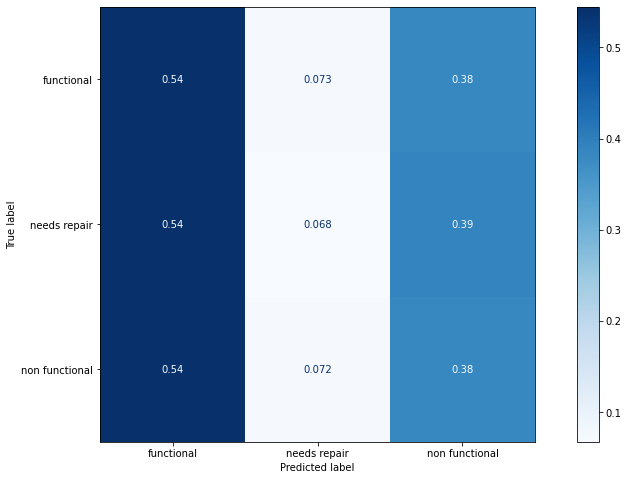

In [620]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(dummy_model, X_train, y_train, cmap='Blues', normalize='true', ax=ax)

## Logistic Regression Pipeline

For logistic regression modeling, I will need to do the following preprocessing steps:
1. Missing Value Imputation
2. Scale numeric features
3. Investigate Outliers
4. Encode categorical features

### Missing Value Imputation

In [621]:
#check for missing values
X_train.isna().sum()

head                     0
funder                   0
well_elevation           0
installer                0
basin                    0
subvillage               0
region                   0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type_2        0
extraction_type_1        0
management               0
water_cost               0
water_quality            0
water_quantity           0
source_type_2            0
source_type_1            0
waterpoint_type          0
date_recorded_yr         0
well_age                 0
status_group_rating      0
population_rating        0
amount_tsh_rating        0
water_quality_rating     0
water_quantity_rating    0
well_age_rating          0
dtype: int64

> **OBSERVATIONS**
> - No missing values to impute 

### Logistic Regression Pipeline

In [ ]:
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype(str)

In [622]:
ohe = OneHotEncoder()
ohe.fit_transform(X_train)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['bool', 'str']

In [ ]:
#create a LR pipeline
lr_pipeline = Pipeline([('ohe', OneHotEncoder()),
                        ('scaler',StandardScaler())])

In [589]:
lr_pipeline.fit_transform(X_train)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['bool', 'str']

In [585]:
#create a gridsearch


## Decision Tree Pipeline

## Feature Engineering

I will conduct feature engineering as part of my modeling pipeline. However, I need to first prepare the data first.

#### Imputation

#### Outliers

#### Transformation

### Categorical Features

#### Cardinality and Rare Labels

#### Label Renaming

#### Imputation

#### Transformation

### New Features Creation

Create Time to Failure Feature using `construction_year` and `date_recorded`

duplicate failures?

# MODEL INTERPRETATION

# RECOMMENDATIONS AND CONCLUSIONS

# Appendix

## Export to Tableau

### Clean up Dataset for Tableau

In [217]:
#export original dataframe to Tableau
#df_explore.to_csv(r'Data/water_well_data_for_tableau.csv', index=False, header=True)